<a href="https://colab.research.google.com/github/Shivani-781/Machine-Learning-and-its-Applications/blob/master/PCA_on_Big_Mart_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PCA ON BIG MART SALES DATA**



Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading Dataset

In [2]:
df = pd.read_csv("/content/drive/My Drive/ML_Data/BMS-Train.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.shape

(8523, 12)

The data has 12 columns and 8523 observations.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


It has 7 categorical variables and rest are numerical. 
We know, PCA can be performed on numerical data. So, we need to covert these variables into numerical type before performing PCA. 

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Count of Item Weight is 7060 while that of others is 8523. Let's check for missing values.

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight and Outlet_Size contains missing values which needs to be handled first.

In [8]:
df[['Item_Weight', 'Outlet_Size']]

,Item_Weight,Outlet_Size
0,9.300,Medium
1,5.920,Medium
2,17.500,Medium
3,19.200,NaN
4,8.930,High
...,...,...
8518,6.865,High
8519,8.380,NaN
8520,10.600,Small
8521,7.210,Medium


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


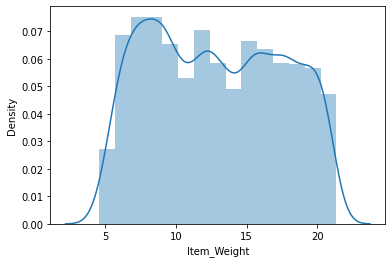

In [9]:
sns.distplot(df['Item_Weight'], bins=15)

Let's replace Item_Weight with the mean value.

In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [11]:
df['Item_Weight'].isnull().sum()

0

Now, Let's view the distribution of Outlet_Size.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


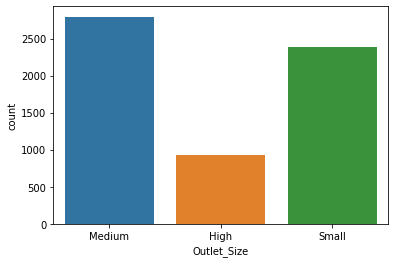

In [12]:
sns.countplot(df['Outlet_Size'])

It will be better to replace NANs with Medium.

In [13]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Medium')

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no missing values in the data now.

In [15]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Let us convert categorical data to numerical type.

In [16]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCB18     9
FDV60     9
FDW49     9
         ..
FDO33     1
FDT35     1
FDE52     1
FDN52     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
df['Item_Identifier'] = df['Item_Identifier'].astype('category').cat.codes

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Based on the values, we can see there are 2 types of fat content - Regular & Low Fat.

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':1, 'Regular':2, 'LF':1, 'reg':2, 'low fat':1})
df['Item_Fat_Content']

0       1
1       2
2       1
3       2
4       1
       ..
8518    1
8519    2
8520    1
8521    2
8522    1
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [20]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

One Hot Encoding will generate more columns, but there is no ordering in the values. Mapping the values seems to be a better option. 

In [21]:
df['Item_Type'] = df['Item_Type'].map({'Fruits and Vegetables': 1, 'Snack Foods': 2, 'Household': 3, 'Frozen Foods': 4, 'Dairy': 5, 'Canned': 6, 'Baking Goods': 7, 'Health and Hygiene': 8, 'Soft Drinks': 9, 'Meat': 10, 'Breads': 11, 'Hard Drinks': 12, 'Starchy Foods': 13, 'Breakfast': 14, 'Seafood': 15, 'Others': 16})
df['Item_Type']

0        5
1        9
2       10
3        1
4        3
        ..
8518     2
8519     7
8520     8
8521     2
8522     9
Name: Item_Type, Length: 8523, dtype: int64

In [22]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [23]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].map({'OUT027': 27, 'OUT013': 13, 'OUT035': 35, 'OUT049': 49, 'OUT046': 46, 'OUT045': 45, 'OUT018': 18, 'OUT017': 17, 'OUT010': 10, 'OUT019': 19})
df['Outlet_Identifier']

0       49
1       18
2       49
3       10
4       13
        ..
8518    13
8519    45
8520    35
8521    18
8522    46
Name: Outlet_Identifier, Length: 8523, dtype: int64

In [24]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
df['Outlet_Size'] = df['Outlet_Size'].map({'Medium': 1, 'Small': 2, 'High': 3})
df['Outlet_Size']

0       1
1       1
2       1
3       1
4       3
       ..
8518    3
8519    1
8520    2
8521    1
8522    2
Name: Outlet_Size, Length: 8523, dtype: int64

In [26]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [27]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1})
df['Outlet_Location_Type']

0       1
1       3
2       1
3       3
4       3
       ..
8518    3
8519    2
8520    2
8521    3
8522    1
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [28]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [29]:
df['Outlet_Type'] = df['Outlet_Type'].map({'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store': 4})
df['Outlet_Type']

0       1
1       2
2       1
3       4
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 8523, dtype: int64

Now, the data is converted to numerical data type.

In [30]:
df.dtypes

Item_Identifier                int16
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

Let us first remove the target variable from the data set.

In [31]:
y = df['Item_Outlet_Sales']
df.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

In [32]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,5,249.8092,49,1999,1,1,1
1,8,5.920,2,0.019278,9,48.2692,18,2009,1,3,2
2,662,17.500,1,0.016760,10,141.6180,49,1999,1,1,1
3,1121,19.200,2,0.000000,1,182.0950,10,1998,1,3,4
4,1297,8.930,1,0.000000,3,53.8614,13,1987,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,2,214.5218,13,1987,3,3,1
8519,897,8.380,2,0.046982,7,108.1570,45,2002,1,2,1
8520,1357,10.600,1,0.035186,8,85.1224,35,2004,2,2,1
8521,681,7.210,2,0.145221,2,103.1332,18,2009,1,3,2


So, let us scale the data.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
scaled_data = scaler.transform(df)

In [36]:
scaled_data

array([[-1.38851383, -0.84187169, -0.73814723, ..., -0.72870674,
        -1.36933384, -0.65095744],
       [-1.71799137, -1.64170589,  1.35474328, ..., -0.72870674,
         1.09156913,  0.26654054],
       [-0.26205684,  1.09855449, -0.73814723, ..., -0.72870674,
        -1.36933384, -0.65095744],
       ...,
       [ 1.28515188, -0.53424315, -0.73814723, ...,  0.73196295,
        -0.13888236, -0.65095744],
       [-0.21975905, -1.33644372,  1.35474328, ..., -0.72870674,
         1.09156913,  0.26654054],
       [-1.62449099,  0.45963367, -0.73814723, ...,  0.73196295,
        -1.36933384, -0.65095744]])

**Principal Component Analysis (PCA)** determines the principal axes of abundance variation. The first principal component represents the maximum variation through the data. The second principal axis is orthogonal to the first principal axis and represents the next highest variation through the data.

By applying PCA, we will be able to find the principal components with maximum variations and will be able to plot them into two-dimensional space.



In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=0.85)

85% of variance is given by using 8 principal components.

In [39]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.n_components_

8

In [41]:
x_pca = pca.transform(scaled_data)

In [42]:
scaled_data.shape

(8523, 11)

In [43]:
x_pca.shape

(8523, 8)

Let's visualize the principal components.

Text(0, 0.5, 'Second Principal Component')

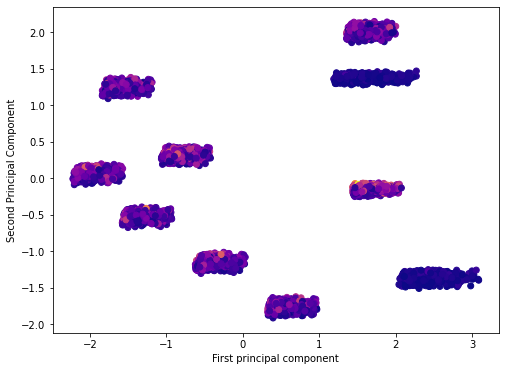

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = y, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

PCA captures differences between the groups. So, PC1 and PC2 are the most significant features as they exhibit different groups. 

Text(0, 0.5, 'Third Principal Component')

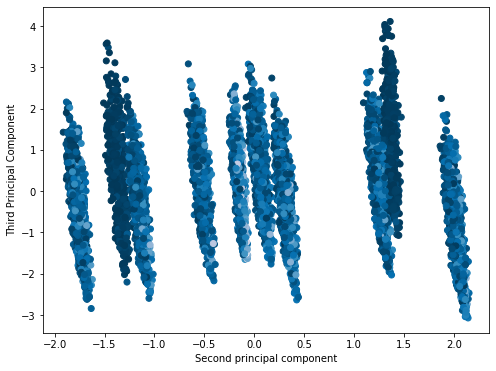

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1], x_pca[:,2], c = y, cmap='PuBu_r')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')

PC1 and PC2 also show much variation in the data.

Text(0, 0.5, 'Fourth Principal Component')

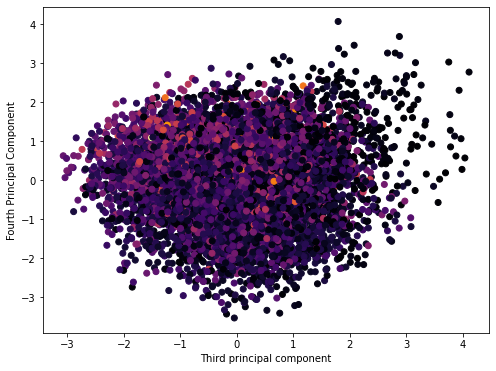

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,2], x_pca[:,3], c = y, cmap='inferno')
plt.xlabel('Third principal component')
plt.ylabel('Fourth Principal Component')

Text(0, 0.5, 'Sixth Principal Component')

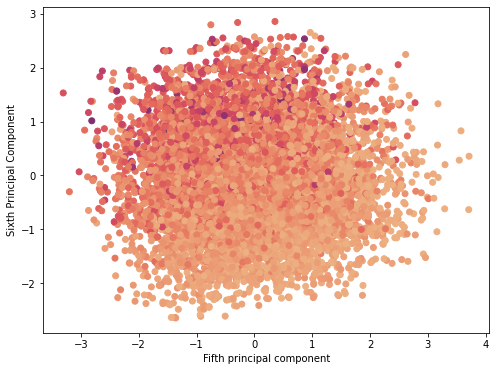

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4], x_pca[:,5], c = y, cmap='flare')
plt.xlabel('Fifth principal component')
plt.ylabel('Sixth Principal Component')

Text(0, 0.5, 'Eighth Principal Component')

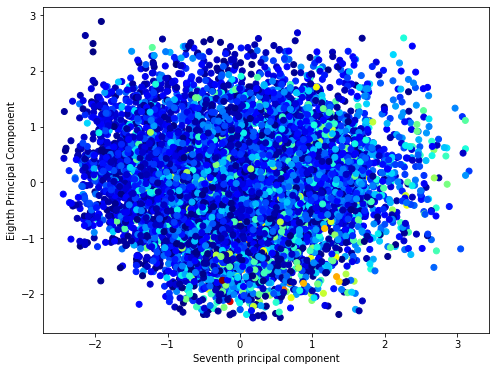

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,6], x_pca[:,7], c = y, cmap='jet')
plt.xlabel('Seventh principal component')
plt.ylabel('Eighth Principal Component')

The rest of the components show very little variation as shown.

In [49]:
pca.components_

array([[ 1.48712692e-02,  9.78573165e-03,  1.79970791e-03,
         1.63547781e-01,  1.60016065e-03, -5.33662619e-03,
        -5.79578770e-01, -3.54004604e-01,  1.20627986e-01,
         4.93442511e-01,  5.03620389e-01],
       [ 1.98575139e-02,  3.19910556e-02, -1.34037577e-02,
         3.10903913e-03, -1.66333755e-02,  1.83426754e-02,
         1.40463165e-01, -5.81058983e-01,  7.35744205e-01,
        -2.72064452e-01, -1.58372210e-01],
       [-5.03075237e-01, -2.93986331e-01,  4.39783922e-01,
         4.99416506e-01,  1.55466705e-01, -1.36150355e-01,
         1.52170859e-01, -1.24209223e-01, -1.34361812e-01,
        -2.57921589e-01,  2.27581281e-01],
       [ 3.43173633e-01,  3.34387434e-01,  1.22248019e-01,
         3.72840499e-01, -5.73353597e-01,  3.50460111e-01,
         1.44189765e-01, -9.31088351e-02, -1.79197418e-01,
        -2.24146740e-01,  2.30417512e-01],
       [ 3.39861692e-01, -3.07797291e-02, -5.95728925e-01,
         2.47377571e-01,  3.90276673e-01, -2.80243747e-01,
  

In [50]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
df_comp

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.014871,0.009786,0.001800,0.163548,0.001600,-0.005337,-0.579579,-0.354005,0.120628,0.493443,0.503620
1,0.019858,0.031991,-0.013404,0.003109,-0.016633,0.018343,0.140463,-0.581059,0.735744,-0.272064,-0.158372
2,-0.503075,-0.293986,0.439784,0.499417,0.155467,-0.136150,0.152171,-0.124209,-0.134362,-0.257922,0.227581
3,0.343174,0.334387,0.122248,0.372840,-0.573354,0.350460,0.144190,-0.093109,-0.179197,-0.224147,0.230418
4,0.339862,-0.030780,-0.595729,0.247378,0.390277,-0.280244,0.169664,-0.159878,-0.194515,-0.251971,0.284488
5,-0.039302,-0.476320,-0.227686,0.021278,0.190092,0.825871,0.008174,-0.011406,-0.007705,-0.011068,0.026546
6,-0.398976,0.755100,-0.084619,0.033628,0.416282,0.294962,0.010145,0.000492,-0.025422,-0.022416,0.028367
7,0.053342,0.015288,-0.172041,0.697479,0.012246,-0.031723,-0.228859,0.396010,0.306522,0.118838,-0.403003


Let's visualize the correlation of the principal components with the features.

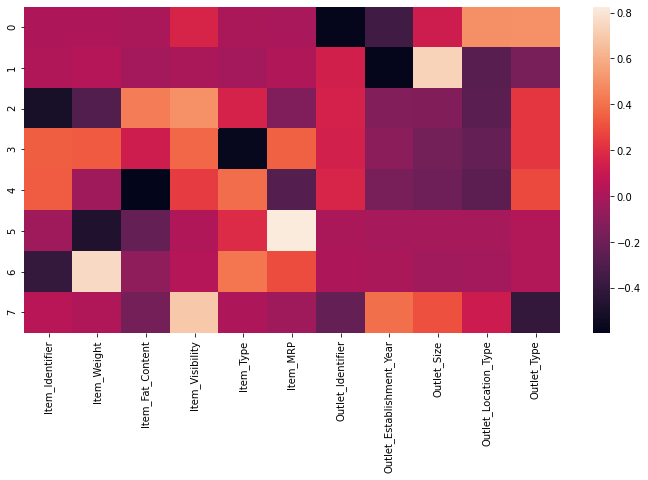

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

We can see, Outlet_Size, Item_Type and Item_weight are highly correlated with PC2, PC5 and PC6 respectively.